In [1]:
import sqlite3 
import pandas as pd

In [4]:
conn = sqlite3.connect('factbook.db')
q = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
q2 = 'SELECT * FROM facts LIMIT 5'
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area- The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's waterarea in square kilometers.

In [6]:
q3 = 'SELECT MIN(population) AS min_pop, MAX(population) AS max_pop, MIN(population_growth) AS min_pop_growth, MAX(population_growth) AS max_pop_growth FROM facts'
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


In [11]:
q4 = 'SELECT * FROM facts WHERE population = (SELECT MAX(population) FROM facts)'
q5 = 'SELECT * FROM facts WHERE population = (SELECT MIN(population) FROM facts)'
q6 = 'SELECT * FROM facts WHERE population_growth = (SELECT MAX(population_growth) FROM facts)'
q7 = 'SELECT * FROM facts WHERE population_growth = (SELECT MIN(population_growth) FROM facts)'

In [8]:
#query for max population
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


This row must be for the population of the entire world - about 7.2 billion humans living on the planet earth! Also, it appears that we are still growing, having more births than deaths. 

In [9]:
#query for min population
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


It look likes Anartica has a population of 0 people living there.

In [12]:
#query for max population growth
pd.read_sql_query(q6, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,162,od,South Sudan,644329,None,None,12042910,4.02,36.91,8.18,11.47,2015-11-01 13:33:16.279312,2015-11-01 13:33:16.279312


South Sudan has a population growth of 4.02% - the highest in this database. This could be explained by the fact that the birth rate is about 3.5 times larger than the death rate. 

In [13]:
#query for the min population growth
pd.read_sql_query(q7, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,190,vt,Holy See (Vatican City),0,0,0.0,842,0.0,NaN,NaN,NaN,2015-11-01 13:35:32.774433,2015-11-01 13:35:32.774433
1,200,ck,Cocos (Keeling) Islands,14,14,0.0,596,0.0,NaN,NaN,NaN,2015-11-01 13:36:12.949429,2015-11-01 13:36:12.949429
2,207,gl,Greenland,2166086,2166086,NaN,57733,0.0,14.48,8.49,5.98,2015-11-01 13:36:35.145214,2015-11-01 13:36:35.145214
3,238,pc,Pitcairn Islands,47,47,0.0,48,0.0,NaN,NaN,NaN,2015-11-01 13:38:08.047849,2015-11-01 13:38:08.047849


There are 4 countries with a population growth of 0%: Holy See, Cocos, Greenland, and Pitcairn Islands. Could this be due to a mistake in data entry, or are each of these countries experiencing 0 net population growth?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\apont\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEFB1847F0>,
      dtype=object)

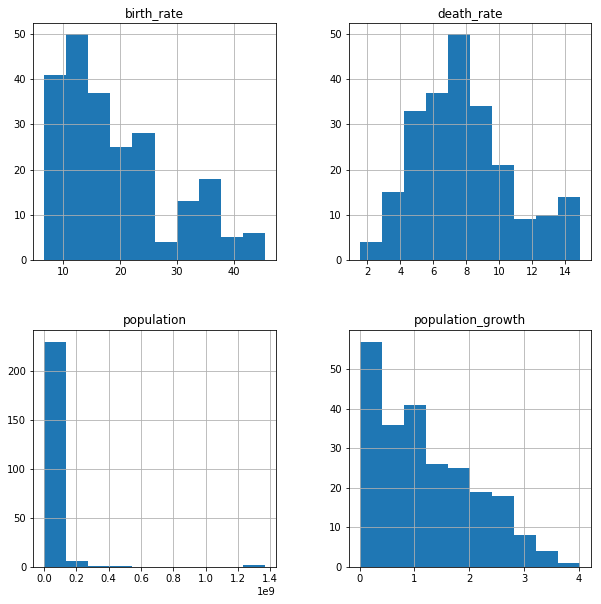

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
q8 = 'SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MAX(population) FROM facts) AND population != (SELECT MIN(population) FROM facts)'
pd.read_sql_query(q8, conn).hist(ax=ax)

In [25]:
#query for population density
q9 = 'SELECT name, CAST(population as Float)/CAST(area as Float) AS density FROM facts ORDER BY density DESC'
pd.read_sql_query(q10, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


In [30]:
q10 = 'SELECT name, MAX(CAST(population as Float)/CAST(area as Float)) AS max_density FROM facts'
pd.read_sql_query(q10, conn)

,name,max_density
0,Macau,21168.964286


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEFB3371D0>],
      dtype=object)

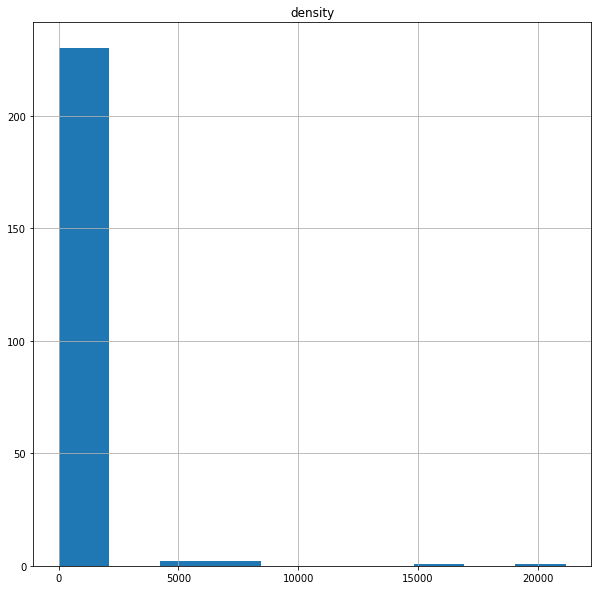

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(q9, conn).hist(ax=ax)

It appears that most of the world has a small population density. Over 200 countries have a population density below 5000.

Which countries have the highest ratios of water to land? Which countries have more water than land?

In [27]:
pd.read_sql_query(q8, conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


In [37]:
#query for water to land
q11 = 'SELECT name, MAX(CAST(area_water as Float)/ CAST(area as Float)) as water_to_land FROM facts'
pd.read_sql_query(q11, conn)

,name,water_to_land
0,British Indian Ocean Territory,0.998897


In [43]:
q12 = 'SELECT name, CAST(area_water as Float)/CAST(area as Float) AS water_to_land FROM facts WHERE water_to_land > 0.5 ORDER BY water_to_land DESC'
pd.read_sql_query(q12, conn)

,name,water_to_land
0,British Indian Ocean Territory,0.998897
1,Virgin Islands,0.818848


The British Indian Ocean Territory has the highest water/land ratio - 99.99%. 

Which country has the highest migration rate?

In [44]:
q13 = 'SELECT name, MAX(migration_rate) AS max_migr_rate FROM facts'
pd.read_sql_query(q13, conn)

,name,max_migr_rate
0,Qatar,22.39


Qatar has the highest migration rate. But what about the lowest?

In [45]:
q14 = 'SELECT name, MIN(migration_rate) AS min_migr_rate FROM facts'
pd.read_sql_query(q14, conn)

,name,min_migr_rate
0,Andorra,0.0


Lets now calculate the average birth rate, death rate, and migration rate - keeping in mind that there are null values skewing the distribution. This will just help us further summarize the data. 

In [46]:
q15 = 'SELECT AVG(birth_rate) AS avg_birth_rate FROM facts'
q16 = 'SELECT AVG(death_rate) AS avg_death_rate FROM facts'
q17 = 'SELECT AVG(migration_rate) AS avg_migr_rate FROM facts'

In [47]:
pd.read_sql_query(q15, conn)

,avg_birth_rate
0,19.328553


In [50]:
#queries for max and min birth_rate to better understand the avg.
q18 = 'SELECT MAX(birth_rate) AS max_birth_rate FROM facts'
q19 = 'SELECT MIN(birth_rate) AS min_birth_rate FROM facts'

In [51]:
pd.read_sql_query(q18, conn)

,max_birth_rate
0,45.45


In [52]:
pd.read_sql_query(q19, conn)

,min_birth_rate
0,6.65


In [48]:
pd.read_sql_query(q16, conn)

,avg_death_rate
0,7.821272


In [55]:
q20 = 'SELECT MAX(death_rate) AS max_death_rate FROM facts'
q21 = 'SELECT MIN(death_rate) AS min_death_rate FROM facts'

In [54]:
pd.read_sql_query(q20, conn)

,max_death_rate
0,14.89


In [56]:
pd.read_sql_query(q21, conn)

,min_death_rate
0,1.53


In [49]:
pd.read_sql_query(q17, conn)

,avg_migr_rate
0,3.433946


## Summary statistics:
 - the average birth rate is 19.33 - with a max of 45.45, and a min of 6.65.
 - the average death rate is 7.82 - with a max of 14.89, and a min of 1.53.
 - the average migration rate is 3.43 - with a max of 22.39, and a min of 0.0.